### CNN文本分类实战

- 1：文本数据预处理，必须都是相同长度，相同向量维度
- 2：构建卷积模型，注意卷积核大小的设计
- 3：将卷积后的特征图池化成一个特征
- 4：将多种特征拼接在一起，准备完成分类任务

In [11]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_features = 3000
sequence_length = 300
embedding_dimension = 100
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=num_features)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [12]:
x_train = pad_sequences(x_train, maxlen=sequence_length)
x_test = pad_sequences(x_test, maxlen=sequence_length)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000, 300)
(25000, 300)
(25000,)
(25000,)


In [13]:
# 多种卷积核，相当于单词数
filter_sizes=[3,4,5]
def convolution():
    inn = layers.Input(shape=(sequence_length, embedding_dimension, 1))#3维的
    cnns = []
    for size in filter_sizes:
        conv = layers.Conv2D(filters=64, kernel_size=(size, embedding_dimension),
                            strides=1, padding='valid', activation='relu')(inn)
        #需要将多种卷积后的特征图池化成一个特征
        pool = layers.MaxPool2D(pool_size=(sequence_length-size+1, 1), padding='valid')(conv)
        cnns.append(pool)
    # 将得到的特征拼接在一起
    outt = layers.concatenate(cnns)

    model = keras.Model(inputs=inn, outputs=outt)
    return model

def cnn_mulfilter():
    model = keras.Sequential([
        layers.Embedding(input_dim=num_features, output_dim=embedding_dimension,
                        input_length=sequence_length),
        layers.Reshape((sequence_length, embedding_dimension, 1)),
        convolution(),
        layers.Flatten(),
        layers.Dense(10, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')

    ])
    model.compile(optimizer=keras.optimizers.Adam(),
                 loss=keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])
    return model

model = cnn_mulfilter()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 100)          300000    
_________________________________________________________________
reshape_4 (Reshape)          (None, 300, 100, 1)       0         
_________________________________________________________________
model_1 (Model)              (None, 1, 1, 192)         76992     
_________________________________________________________________
flatten_3 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1930      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [14]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 29s 1ms/sample - loss: 0.4692 - accuracy: 0.7665 - val_loss: 0.3150 - val_accuracy: 0.8716
Epoch 2/5
22500/22500 [==============================] - 29s 1ms/sample - loss: 0.2771 - accuracy: 0.8896 - val_loss: 0.2822 - val_accuracy: 0.8904
Epoch 3/5
22500/22500 [==============================] - 30s 1ms/sample - loss: 0.1954 - accuracy: 0.9297 - val_loss: 0.2683 - val_accuracy: 0.8996
Epoch 4/5
22500/22500 [==============================] - 29s 1ms/sample - loss: 0.1343 - accuracy: 0.9574 - val_loss: 0.2908 - val_accuracy: 0.8968
Epoch 5/5
22500/22500 [==============================] - 29s 1ms/sample - loss: 0.0889 - accuracy: 0.9744 - val_loss: 0.3274 - val_accuracy: 0.8984


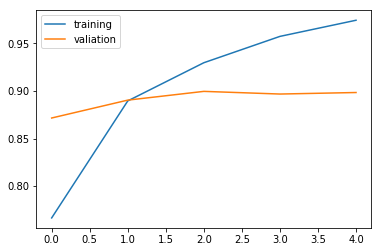

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valiation'], loc='upper left')
plt.show()